In [1]:
import sys
sys.path.insert(1, '../../libs')
from utils import get_data, temporal_train_test_split


import sys
sys.path.insert(1, '../../libs')
from utils import temporal_train_test_split, evaluate_bert
from autorship import AuthorClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, StackingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report
from joblib import Parallel, delayed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
bert_df = pd.read_csv("../../results/bert_results_full.csv").drop("Unnamed: 0", axis=1)
keys = bert_df.clf.unique()
values = ['Multinomial Naive Bayes',
        'Logistic Regression (L1)',
        'Logistic Regression (L2)',
        'SVM (linear kernel)',
        'SVM (rbf kernel)',
        'Decision Tree',
        'Random Forest',
        'AdaBoost',
        'Gradient boosting',
        'Stacking']

dict_clf = dict(zip(keys, values))
bert_df["clf"] = bert_df["clf"].map(dict_clf)

In [3]:
n_gram_df = pd.read_csv("../../results/otimal_results.csv").drop("Unnamed: 0", axis=1)
keys = n_gram_df.clf.unique()
values = ['Multinomial Naive Bayes',
        'Logistic Regression (L1)',
        'Logistic Regression (L2)',
        'SVM (linear kernel)',
        'SVM (rbf kernel)',
        'Decision Tree',
        'Random Forest',
        'AdaBoost',
        'Gradient boosting',
        'Stacking']

dict_clf = dict(zip(keys, values))
n_gram_df["clf"] = n_gram_df["clf"].map(dict_clf)

In [4]:
word2vec_df = pd.read_csv("../../results/word2vec_results_full.csv").drop("Unnamed: 0", axis=1)
keys = word2vec_df.clf.unique()
values = ['Multinomial Naive Bayes',
        'Logistic Regression (L1)',
        'Logistic Regression (L2)',
        'SVM (linear kernel)',
        'SVM (rbf kernel)',
        'Decision Tree',
        'Random Forest',
        'AdaBoost',
        'Gradient boosting',
        'Stacking']

dict_clf = dict(zip(keys, values))
word2vec_df["clf"] = word2vec_df["clf"].map(dict_clf)

In [5]:
bert_df["vectorization"] = ["BERTimbau" for i in range(len(bert_df))]

In [6]:
n_gram_df["vectorization"] = ["n-gram" for i in range(len(n_gram_df))]

In [7]:
word2vec_df["vectorization"] = ["word2vec" for i in range(len(word2vec_df))]

In [10]:
pos_df = pd.read_csv("../../results/pos_results_full.csv").drop("Unnamed: 0", axis=1)
keys = pos_df.clf.unique()
values = ['Multinomial Naive Bayes',
        'Logistic Regression (L1)',
        'Logistic Regression (L2)',
        'SVM (linear kernel)',
        'SVM (rbf kernel)',
        'Decision Tree',
        'Random Forest',
        'AdaBoost',
        'Gradient boosting',
        'Stacking']

dict_clf = dict(zip(keys, values))
pos_df["clf"] = pos_df["clf"].map(dict_clf)

In [13]:
pos_df["vectorization"] = ["POS tagging + n-gram" for i in range(len(pos_df))]

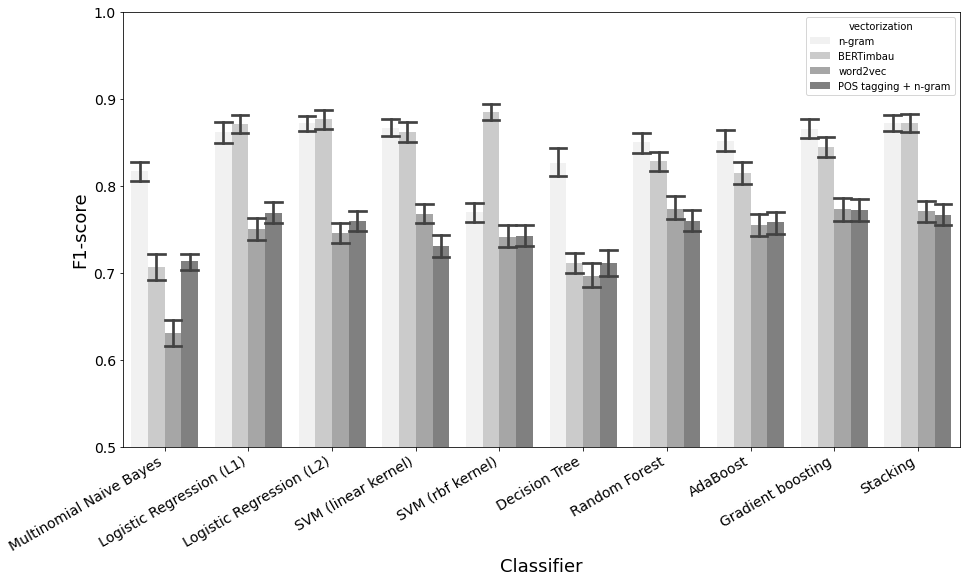

In [19]:
mtr_df = pd.concat([n_gram_df, bert_df, word2vec_df, pos_df])

plt.figure(figsize=(15,8))
sns.barplot(x="clf", y="f1_macro", hue="vectorization", data=mtr_df, estimator=np.mean, ci=95, capsize=.2, color='grey')
plt.ylim(0.5, 1)
plt.xlabel("Classifier")
plt.ylabel("F1-score")
plt.xticks(rotation=30, ha='right')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Classifier", fontsize=18)
plt.ylabel("F1-score", fontsize=18)
plt.show()

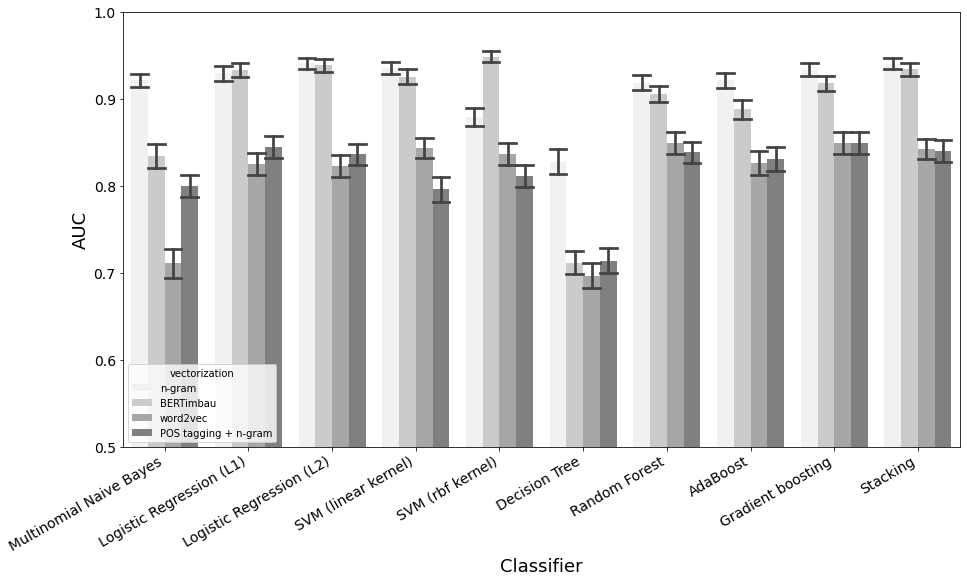

In [21]:
mtr_df = pd.concat([n_gram_df, bert_df, word2vec_df, pos_df])

plt.figure(figsize=(15,8))
sns.barplot(x="clf", y="auc_score", hue="vectorization", data=mtr_df, estimator=np.mean, ci=95, capsize=.2, color='grey')
plt.ylim(0.5, 1)
plt.xlabel("Classifier")
plt.ylabel("AUC")
plt.xticks(rotation=30, ha='right')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Classifier", fontsize=18)
plt.ylabel("AUC", fontsize=18)
plt.show()

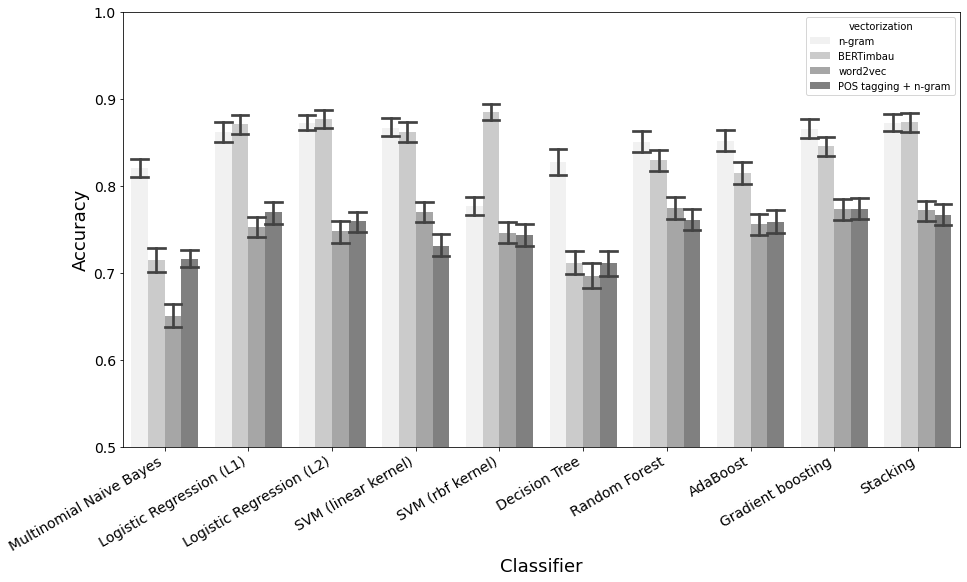

In [22]:
mtr_df = pd.concat([n_gram_df, bert_df, word2vec_df, pos_df])

plt.figure(figsize=(15,8))
sns.barplot(x="clf", y="accuracy", hue="vectorization", data=mtr_df, estimator=np.mean, ci=95, capsize=.2, color='grey')
plt.ylim(0.5, 1)
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.xticks(rotation=30, ha='right')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Classifier", fontsize=18)
plt.ylabel("Accuracy", fontsize=18)
plt.show()

In [23]:
mtr_df.to_csv("../../results/otimal_results_full.csv")

In [37]:
f1_max = list(mtr_df.groupby(["vectorization", "clf"]).mean().reset_index().groupby(["vectorization"])["f1_macro"].max())

In [41]:
mtr_df.groupby(["vectorization", "clf"]).mean()[mtr_df.groupby(["vectorization", "clf"]).mean()["f1_macro"].isin(f1_max)]

,,precision_author1,recall_author1,f1_score_author1,precision_author2,recall_author2,f1_score_author2,precision_weighted,precision_micro,precision_macro,recall_weighted,recall_micro,recall_macro,f1_weighted,f1_micro,f1_macro,auc_score,accuracy
vectorization,clf,,,,,,,,,,,,,,,,,
BERTimbau,SVM (rbf kernel),0.884602,0.888341,0.885703,0.888229,0.881199,0.883930,0.886514,0.885252,0.886411,0.885252,0.885252,0.884771,0.885116,0.885252,0.884814,0.948604,0.885252
POS tagging + n-gram,Gradient boosting,0.774730,0.780252,0.775265,0.777159,0.766347,0.769415,0.776365,0.772947,0.775943,0.772947,0.772947,0.773302,0.772370,0.772947,0.772340,0.849840,0.772947
n-gram,Stacking,0.881470,0.863371,0.871811,0.865586,0.882105,0.873256,0.873709,0.872677,0.873523,0.872677,0.872677,0.872743,0.872599,0.872677,0.872533,0.940615,0.872677
word2vec,Random Forest,0.770930,0.787261,0.777804,0.781029,0.761381,0.769742,0.776238,0.774233,0.775982,0.774233,0.774233,0.774320,0.773855,0.774233,0.773769,0.848810,0.774233


In [56]:
mtr_df["clf"]

0       Multinomial Naive Bayes
1       Multinomial Naive Bayes
2       Multinomial Naive Bayes
3       Multinomial Naive Bayes
4       Multinomial Naive Bayes
                 ...           
1045                   Stacking
1046                   Stacking
1047                   Stacking
1048                   Stacking
1049                   Stacking
Name: clf, Length: 4200, dtype: object

In [63]:
best_results = mtr_df[((mtr_df["vectorization"] == "BERTimbau") & (mtr_df["clf"] == "SVM (rbf kernel)"))
        | (mtr_df["vectorization"] == "POS tagging + n-gram") & (mtr_df["clf"] == "Gradient boosting")
        | (mtr_df["vectorization"] == "n-gram") & (mtr_df["clf"] == "Stacking")
        | (mtr_df["vectorization"] == "word2vec") & (mtr_df["clf"] == "Random Forest")]

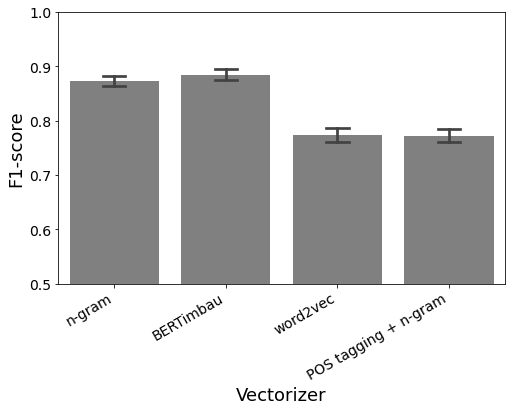

In [93]:
plt.figure(figsize=(8,5))
sns.barplot(x="vectorization", y="f1_macro", data=best_results, estimator=np.mean, ci=95, capsize=.2, color='grey')
plt.ylim(0.5, 1)
plt.xlabel("Classifier")
plt.ylabel("F1-score")
plt.xticks(rotation=30, ha='right')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Vectorizer", fontsize=18)
plt.ylabel("F1-score", fontsize=18)
plt.show()

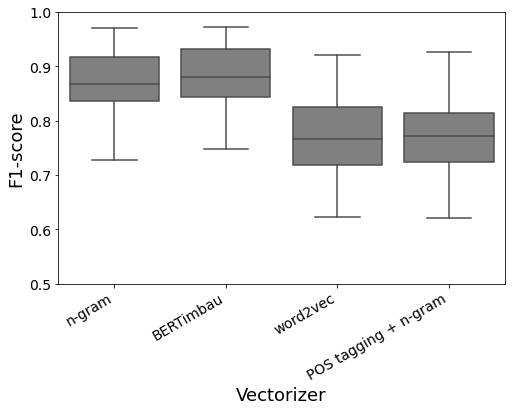

In [91]:
plt.figure(figsize=(8,5))
sns.boxplot(x="vectorization", y="f1_macro",data=best_results, color='grey')
plt.ylim(0.5, 1)
plt.xlabel("Classifier")
plt.ylabel("F1-score")
plt.xticks(rotation=30, ha='right')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Vectorizer", fontsize=18)
plt.ylabel("F1-score", fontsize=18)
plt.show()

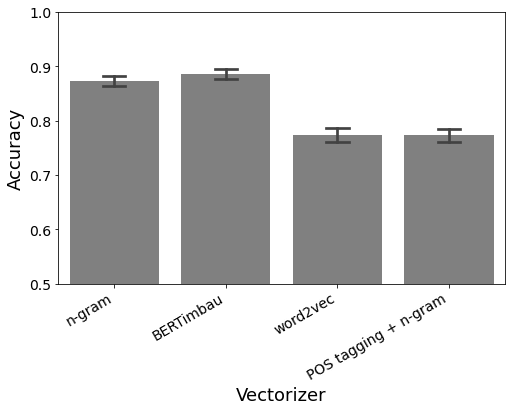

In [94]:
plt.figure(figsize=(8,5))
sns.barplot(x="vectorization", y="accuracy", data=best_results, estimator=np.mean, ci=95, capsize=.2, color='grey')
plt.ylim(0.5, 1)
plt.xticks(rotation=30, ha='right')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Vectorizer", fontsize=18)
plt.ylabel("Accuracy", fontsize=18)
plt.show()

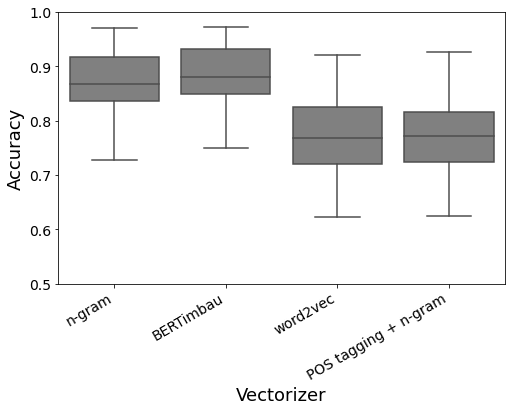

In [95]:
plt.figure(figsize=(8,5))
sns.boxplot(x="vectorization", y="accuracy", data=best_results, color='grey')
plt.ylim(0.5, 1)
plt.xticks(rotation=30, ha='right')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Vectorizer", fontsize=18)
plt.ylabel("Accuracy", fontsize=18)
plt.show()

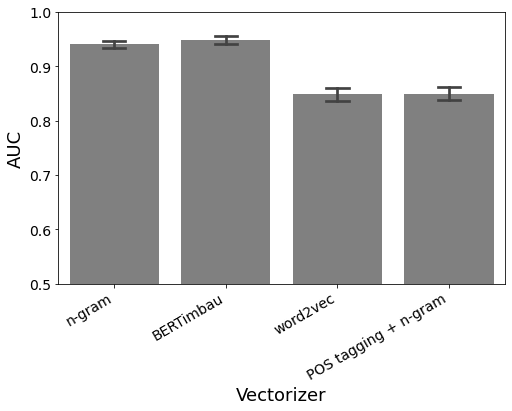

In [96]:
plt.figure(figsize=(8,5))
sns.barplot(x="vectorization", y="auc_score", data=best_results, estimator=np.mean, ci=95, capsize=.2, color='grey')
plt.ylim(0.5, 1)
plt.xticks(rotation=30, ha='right')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Vectorizer", fontsize=18)
plt.ylabel("AUC", fontsize=18)
plt.show()

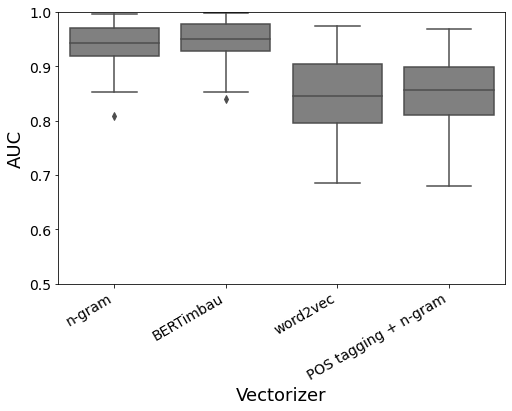

In [98]:
plt.figure(figsize=(8,5))
sns.boxplot(x="vectorization", y="auc_score", data=best_results, color='grey')
plt.ylim(0.5, 1)
plt.xticks(rotation=30, ha='right')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Vectorizer", fontsize=18)
plt.ylabel("AUC", fontsize=18)
plt.show()